In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read of adult.data and adult.test

First of all I connected the google collab with my google drive. This happens in oreder to avoid uploading the files each time I rerun the programme.
Because the files does not include headers I read just the pure data. After that I define the headers (column names) based on the names that the site provide us. https://archive.ics.uci.edu/ml/datasets/Adult

Then as the exercise says we have to omit the rows that has on at least one Feature the value " ?" (all the values of the datasets have a space in front of them). 

The same process is done on the test set, but this time we **skip the first line** because it has information we don't need. Something extrat that the test set needs is that on the coloumn salary the values has en extra "." in the end. We simple remove this ".".

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#I used my google drive and saved the file into a location, in order to avoid uploading them every time I need them
Location = '/content/drive/MyDrive/Machine_Learning/adult.data'

#read the file and pass it into a dataframe, without headers
data_df = pd.read_csv(Location,header=None);
#set my Features headers 
data_df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
# data_df.columns = [x.strip() for x in data_df.columns]
print(data_df.shape)
print(data_df.columns.values)

#keep all the lines that don't include in any feature the "?" value
data_df = data_df[(data_df['age'] != " ?") & (data_df['workclass'] != " ?") & (data_df['fnlwgt'] != " ?") & (data_df['education'] != " ?") & (data_df['education-num'] != " ?") 
& (data_df['marital-status'] != " ?") & (data_df['occupation'] != " ?") & (data_df['relationship'] != " ?") & (data_df['race'] != " ?") & (data_df['sex'] != " ?") & (data_df['capital-gain'] != " ?") & (data_df['capital-loss'] != " ?") 
& (data_df['hours-per-week'] != " ?") & (data_df['native-country'] != " ?") & (data_df['salary'] != " ?")]

#Scaler, uncomment the lines below to standarize the continue features for the train set
# continue_features=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
# scaler = StandardScaler()
# data_df[continue_features] = scaler.fit_transform(data_df[continue_features])
# print("Mean of standarized age: ",'{0:.10f}'.format(data_df['age'].mean()))
# print("Variance of standarized age: ",'{0:.10f}'.format(data_df['age'].var()))

#keep all the unique values of salary because this will be eventually our classes
classes=data_df['salary'].unique().tolist()
print(data_df.shape)
data_df.head(10)

(32561, 15)
['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'salary']
(30162, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [56]:
# Location of my test file in the google drive
Location = '/content/drive/MyDrive/Machine_Learning/adult.test'

#skip the first row of the file and again without headers
test_df = pd.read_csv(Location,skiprows=[0],header=None);
#set my Features headers 
test_df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
print(test_df.shape)

#keep all the lines that don't include in any feature the "?" value
test_df = test_df[(test_df['age'] != " ?") & (test_df['workclass'] != " ?") & (test_df['fnlwgt'] != " ?") & (test_df['education'] != " ?") & (test_df['education-num'] != " ?") 
& (test_df['marital-status'] != " ?") & (test_df['occupation'] != " ?") & (test_df['relationship'] != " ?") & (test_df['race'] != " ?") & (test_df['sex'] != " ?") & (test_df['capital-gain'] != " ?") & (test_df['capital-loss'] != " ?") 
& (test_df['hours-per-week'] != " ?") & (test_df['native-country'] != " ?") & (test_df['salary'] != " ?")]

#Scaler, uncomment the lines below to standarize the continue features for the test set
# scaler = StandardScaler()
# test_df[continue_features] = scaler.fit_transform(test_df[continue_features])

print(test_df.shape)
#on the testset the salary had the form <=50K.
#to avoid any confusion we remove the "." using the line below
test_df['salary']=test_df['salary'].apply(lambda x:x.replace(".",""))
test_df.head(10)


(16281, 15)
(15060, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


# Prior Calculator

This function simply calculates the πκ that we have. Its class has its own prior and is calculated in this way:    
**π(Α)= rows_blong_in_ClassA/all_the_rows**. In our case we will have 2 priors one for the class(<=50K) and another one for the class(>50K).

Priors:
{' <=50K': 75.10443604535509, ' >50K': 24.888933094622374}

In [57]:
# A function that computes the 2 priors (we have only 2 different classes)
#the priors of each class are ' <=50K'->75.10443604535509 and ' 50K'-> 24.888933094622374
def Prior_Calculator(df,classes):
  # we take only the last feature
  last_label=df[['salary']]
  counts=[]
  for i in range(len(classes)):
    counts.append(0)
  #first count the populations for each classe
  for i in last_label.values:
    counts[classes.index(i)]+=1
  #return the division with the total population
  print(counts)
  return [x/df.shape[0]*100 for x in counts]

priors=Prior_Calculator(data_df,classes)
#create a dictionary to know the class of each prior
priors_dict = {classes[i]: priors[i] for i in range(len(classes))}
print(priors_dict)

[22654, 7508]
{' <=50K': 75.10775147536636, ' >50K': 24.892248524633644}


# Parameter Estimator

In this section we have to calculate first the μ,σ parameters for our continues features. We assume that the continues Features ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] follows the Gauss Distribution (when a feature is continue it means that it is a number). Now that we assume that the values follow the Gauss Distribution we follow the Maximum Likelihood Estimation (MLE) to estimate these two parameters (μ,σ). We have to estimate a μ,σ for each feature, for each class. The μ is the mean and the σ is the var(see more about this on the pdf). 

In [58]:
import math

#This Function return the μ and σ parameters for the continue features
def Parameters_Estimator(df,continue_features,classes):
  m_dict={}
  s_dict={}
  for c in classes:
    m_lt={}
    for col in continue_features:
      #takes the mean of the feature if it has salary in class c
      m_lt[col]=(df[col].where(df['salary']==c).mean())
    m_dict[c]=m_lt

    s_lt={}
    for i,col in enumerate(continue_features):
      #takes the var of the feature if it has salary less_than(lt) 50k
      s_lt[col]=( math.sqrt(((df[col].where(df['salary']==c)-m_dict[c][col])**2).mean()) )
    s_dict[c]=s_lt  
  return m_dict,s_dict


#define the features that has continue values
continue_features=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
#2 lists that include 2 dictionary each
μ,σ=Parameters_Estimator(data_df,continue_features,classes)
# Print the results
print(μ)
print(σ) 
print(σ)

{' <=50K': {'age': 36.60806038668668, 'fnlwgt': 190338.64672905448, 'education-num': 9.629116270857244, 'capital-gain': 148.8938377328507, 'capital-loss': 53.44800035313852, 'hours-per-week': 39.34859186015715}, ' >50K': {'age': 43.95911028236548, 'fnlwgt': 188149.96217368142, 'education-num': 11.606419818859882, 'capital-gain': 3937.6798082045816, 'capital-loss': 193.75066595631327, 'hours-per-week': 45.70657964837507}}
{' <=50K': {'age': 13.46433407388627, 'fnlwgt': 106568.99082609422, 'education-num': 2.4135428617999684, 'capital-gain': 936.3716120600063, 'capital-loss': 310.26341487381796, 'hours-per-week': 11.95051036860488}, ' >50K': {'age': 10.26894890021735, 'fnlwgt': 102814.88940721686, 'education-num': 2.3682652194811826, 'capital-gain': 14385.101938325668, 'capital-loss': 592.7861087307631, 'hours-per-week': 10.736271573483526}}
{' <=50K': {'age': 13.46433407388627, 'fnlwgt': 106568.99082609422, 'education-num': 2.4135428617999684, 'capital-gain': 936.3716120600063, 'capital

# Density function for the discrete features
As the Presentations says the density function when it comes to discrete features fk(x) = p(X = x|Y = k): the density for X.
As we know the p(A|B)=p(AB)/p(B).
So the logic we follow here is that we count the rows that has on feature X the value x and on the same time they belong on one of the two classes. By following this eventually we will have a value (of the density function) for every unique value of every discrete feature, of every class.

In [59]:
# functions that calculate the density function of the discrete vvalues
def discrete_probs(df,discrete_features,classes):
  
  discrete_dens={}
  for c in classes:
    all_p=[]
    #total rows that belong to class c
    total_=int(df['salary'].where(df['salary']==c).value_counts())
    print("Total rows that belong to ",c,":",total_)
    for col in discrete_features:
      # uniq_values.append(df[col].unique().tolist())
      #create dictionary to know for what value we are refering to and count the rows that has this value and salary according to the c class
      all_p.append(df[col].where(df['salary']==c).value_counts().to_dict())

    # print(all_p_lt)
    for i in range(len(all_p)):
      #make the division with total_ to have the probability 
      all_p[i]={k:v/total_ for k, v in  all_p[i].items()}
    #add the discrete density values of class c in the dictionary
    discrete_dens[c]=all_p
  return discrete_dens

#define the features that has discrete values
discrete_features=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
probs=discrete_probs(data_df,discrete_features,classes) 

#Print all the density values for ever class, for every feature for every different value
for k,v in probs.items():
  print(k)
  for d in v:
    print(d)


Total rows that belong to   <=50K : 22654
Total rows that belong to   >50K : 7508
 <=50K
{' Private': 0.768517701068244, ' Self-emp-not-inc': 0.07879403195903593, ' Local-gov': 0.06435949501191843, ' State-gov': 0.041273064359495015, ' Federal-gov': 0.025514257967687824, ' Self-emp-inc': 0.020923457226096936, ' Without-pay': 0.0006179924075218504}
{' HS-grad': 0.3629822547894412, ' Some-college': 0.23580824578440893, ' Bachelors': 0.12880727465348282, ' 11th': 0.043656749359936436, ' Assoc-voc': 0.04250904917453871, ' 10th': 0.03359230158029487, ' Assoc-acdm': 0.03319502074688797, ' Masters': 0.03129690120949943, ' 7th-8th': 0.023042288337600424, ' 9th': 0.018981195373885408, ' 12th': 0.015361525558400282, ' 5th-6th': 0.012183278891145052, ' 1st-4th': 0.006400635649333451, ' Prof-school': 0.0060033548159265475, ' Doctorate': 0.004193519908183985, ' Preschool': 0.0019864041670345192}
{' Never-married': 0.4085812660015891, ' Married-civ-spouse': 0.3383949854330361, ' Divorced': 0.1660633

# Log Posterior
This part is about the calculation of the final 2 values that will determine whether the row belong to Class_<=50k or Class>50K. For each row we calculate the density value (gauss function) for the continues features and at the same time based on the value for the specific feature we take the corresponding density value we calculated. All the above values are combined into two final products, including the priors. We log them to get the log-posteriors for our 2 classes. 

In a few words we produced 2 metrics as representatives of each class. These metrics shows as how possible is our value to belong in each class. Finally, we are going to compare these metrics and if the representative of the Class(<=50K) is bigger than the representative of the Class(>50K) then the row belongs to the first Class, or the other way around.

In [60]:
import math
import operator
#function that omputes the gauss distribution 
def gauss_f(x,s,m):
  return 1/(math.sqrt(2*math.pi)*s)*math.exp(-(((x-m)**2)/(2*(s**2)) ) )

#A functions that calculate the log-posterior and return the prediction
def Log_Posterior(classes,df,totals,cols,discrete_features,continue_features,values,probs,μ,σ,priors_dict):
  
  products_={}
  for c in classes:
    products_[c]=priors_dict[c]
    for i in range(len(cols)-1):
      if cols[i] in discrete_features:
        #if the feature is a discrete we calculate the density function based on the probabilities we calculated for every value of every feature
        if values[i] in probs[c][discrete_features.index(cols[i])].keys():
          products_[c]*=probs[c][discrete_features.index(cols[i])][values[i]]
        else:
          #if a prob=0 then we apply the m-estimation technique
          products_[c]*=1/(totals[c]+df[cols[i]].nunique())  
      elif cols[i] in  continue_features:
        #if the feature is a continue we calculate the gauss with the appropriate μ,σ   
        products_[c]*=gauss_f(values[i],σ[c][cols[i]],μ[c][cols[i]])
  #find the max in the dictionary in order to return the prediction
  max_key=max(products_.items(), key=operator.itemgetter(1))[0]
  return max_key

#total rows of each class
totals={}
for c in classes:
  totals[c]=int(data_df['salary'].where(data_df['salary']==c).value_counts())
print()

# Predictions

This section creates the prediction column, using the functions above. It also prints how many rows predicted correct from the Train set as well as from the test set (compared with the total rows).

In [61]:
# Final class that creates and extra column for the predictions made
def my_predictions(classes,df,totals,discrete_features,continue_features,probs,μ,σ,priors_dict):
  df['prediction']=df.apply(lambda row:Log_Posterior(classes,df,totals,df.columns.values.tolist(),discrete_features,continue_features,row.values.tolist(),probs,μ,σ,priors_dict),axis=1)
#predict for train set
my_predictions(classes,data_df,totals,discrete_features,continue_features,probs,μ,σ,priors_dict)
#predict for test set
my_predictions(classes,test_df,totals,discrete_features,continue_features,probs,μ,σ,priors_dict)

#gather the correct predictions for the train set
corrects_train=len(data_df[data_df['prediction']==data_df['salary']])
print("Train set correct predictions: ",corrects_train,"/",data_df.shape[0])

#gather the correct predictions for the test set
corrects_test=len(test_df[test_df['prediction']==test_df['salary']])
print("Test set correct predictions: ",corrects_test,"/",test_df.shape[0])


Train set correct predictions:  24959 / 30162
Test set correct predictions:  12414 / 15060


In [36]:
#A quick check that the prediction column was created fine
test_df.head(10)
print(test_df)

            age      workclass    fnlwgt  ...  native-country  salary prediction
0     -1.029005        Private  0.352098  ...   United-States   <=50K      <=50K
1     -0.057423        Private -0.944995  ...   United-States   <=50K      <=50K
2     -0.804794      Local-gov  1.395062  ...   United-States    >50K       >50K
3      0.391000        Private -0.277369  ...   United-States    >50K      <=50K
5     -0.356371        Private  0.085944  ...   United-States   <=50K      <=50K
...         ...            ...       ...  ...             ...     ...        ...
16275 -0.431108        Private  0.526407  ...   United-States   <=50K      <=50K
16276  0.017315        Private  0.244316  ...   United-States   <=50K      <=50K
16278 -0.057423        Private  1.755175  ...   United-States   <=50K       >50K
16279  0.391000        Private -1.001078  ...   United-States   <=50K      <=50K
16280 -0.281634   Self-emp-inc -0.070716  ...   United-States    >50K       >50K

[15060 rows x 16 columns]


# Evaluation
Export the needed data to the requested files.

In [68]:
#create the file with the estimators
f = open("nb_parameters.txt", "w")
f.write("Priors Probabilities:\n")
for k,v in priors_dict.items():
  f.write(str(k)+"->"+str(v)+"\n")
  
f.write("\n\nEstimator μ\n")
for k,v in μ.items():
  f.write(str(k)+"->"+str(v)+"\n")

f.write("\n\nEstimator σ\n")  
for k,v in σ.items():
  f.write(str(k)+"->"+str(v)+"\n")  

f.write("\n\nDensity of discrete features\n")  
for k,v in probs.items():
  f.write("\n"+str(k)+"\n")
  for i in range(len(v)):
    f.write("\t"+discrete_features[i]+"\n")
    for k2,v2 in v[i].items():
      f.write("\t\t"+str(k2)+":"+str(v2)+"\n")
f.close()

In [69]:

#create the file with the predictions only for test set
test_df['prediction'].apply(lambda x:0 if x==" <=50K" else 1).to_csv('predictions.txt',index=False)



In [70]:
f = open("classification.txt", "w")

f.write("Train set correct predictions: "+str(corrects_train)+"/"+str(data_df.shape[0])+"\n")
f.write("Train set wrong predictions(error): "+str(data_df.shape[0]-corrects_train)+"/"+str(data_df.shape[0])+"\n")
f.write("Test set accuracy: "+str(corrects_train/data_df.shape[0]*100)+"%\n\n")

f.write("Test set correct predictions: "+str(corrects_test)+"/"+str(test_df.shape[0])+"\n")
f.write("Test set wrong predictions(error): "+str(test_df.shape[0]-corrects_test)+"/"+str(test_df.shape[0])+"\n")
f.write("Test set accuracy: "+str(corrects_test/test_df.shape[0]*100)+"%\n")
f.close()

In [71]:
#a test to see the tp,fp,fn,tn 
tp = len(data_df[(data_df['salary']==" <=50K") & (data_df['prediction']==" <=50K")])
fp = len(data_df[(data_df['salary']==" >50K") & (data_df['prediction']==" <=50K")])
fn = len(data_df[(data_df['salary']==" <=50K") & (data_df['prediction']==" >50K")])
tn = len(data_df[(data_df['salary']==" >50K") & (data_df['prediction']==" >50K")])

print(tp,fp,fn,tn)

21103 3652 1551 3856


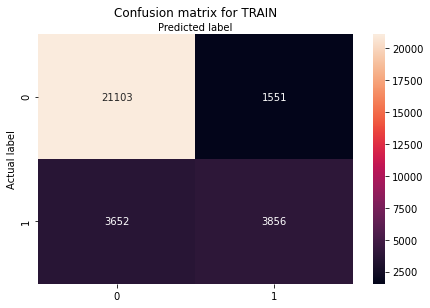

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

#the classification errors for train
cm = confusion_matrix(data_df['salary'], data_df['prediction'])

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for TRAIN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_data.eps', dpi = 300)

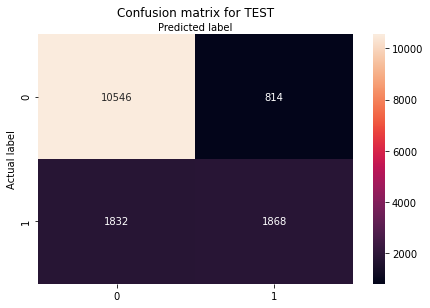

In [73]:
#the classification errors for test
cm = confusion_matrix(test_df['salary'], test_df['prediction'])

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for TEST', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_test.eps', dpi = 300)